# Cheatsheet Exam FMAD
Cheatsheet for code for the fmad exam

In [59]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as smp

sns.set(rc={'figure.figsize':(12, 12)})

## Exploratory Analysis

In [110]:
path = 'PreviousExams/data/empleados.csv' # Change
data = pd.read_csv(path)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,RateType,Rate,Education_Field
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,DailyRate,1463,Bachelor//Medical
1,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,HourlyRate,64,Bachelor//Medical
2,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,MonthlyRate,14408,Bachelor//Medical
3,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,DailyRate,874,Bachelor//Medical
4,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,HourlyRate,72,Bachelor//Medical


### Variable description

#### Number of rows and columns

In [111]:
print(f"There are {len(data)} observations in the table")
print(f"There are {len(data.columns)} variables in the table")

There are 3528 observations in the table
There are 21 variables in the table


#### Non-null count and variable type

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3528 non-null   int64  
 1   Attrition              3528 non-null   object 
 2   BusinessTravel         3528 non-null   object 
 3   Department             3528 non-null   object 
 4   DistanceFromHome       3519 non-null   float64
 5   Gender                 3528 non-null   object 
 6   JobLevel               3528 non-null   int64  
 7   JobRole                3528 non-null   object 
 8   JobSatisfaction        3528 non-null   object 
 9   MaritalStatus          3528 non-null   object 
 10  MonthlyIncome          3528 non-null   int64  
 11  NumCompaniesWorked     3522 non-null   float64
 12  OverTime               3528 non-null   object 
 13  PerformanceRating      3528 non-null   object 
 14  TotalWorkingYears      3528 non-null   int64  
 15  Trai

#### Variable decription (mean, std etc)

In [114]:
data.describe()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,Rate
count,3528.000000,3519.000000,3528.000000,3528.000000,3522.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,36.915816,9.291560,2.059524,6494.353741,2.706133,11.278912,2.809524,7.011054,4.227041,5071.344955
std,9.080524,8.217462,1.098947,4681.281775,2.486022,7.732697,1.250120,6.150844,3.621172,7755.001787
min,18.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,30.000000,2.000000,1.000000,2933.500000,1.000000,6.000000,2.000000,3.000000,2.000000,83.000000
50%,35.000000,7.000000,2.000000,4880.000000,2.000000,10.000000,3.000000,5.000000,3.000000,798.500000
75%,43.000000,14.000000,3.000000,8383.750000,4.000000,15.000000,3.000000,10.000000,7.000000,8047.000000
max,60.000000,29.000000,5.000000,19999.000000,9.000000,40.000000,6.000000,40.000000,18.000000,26999.000000


### Plots

#### Histogram + Density curve

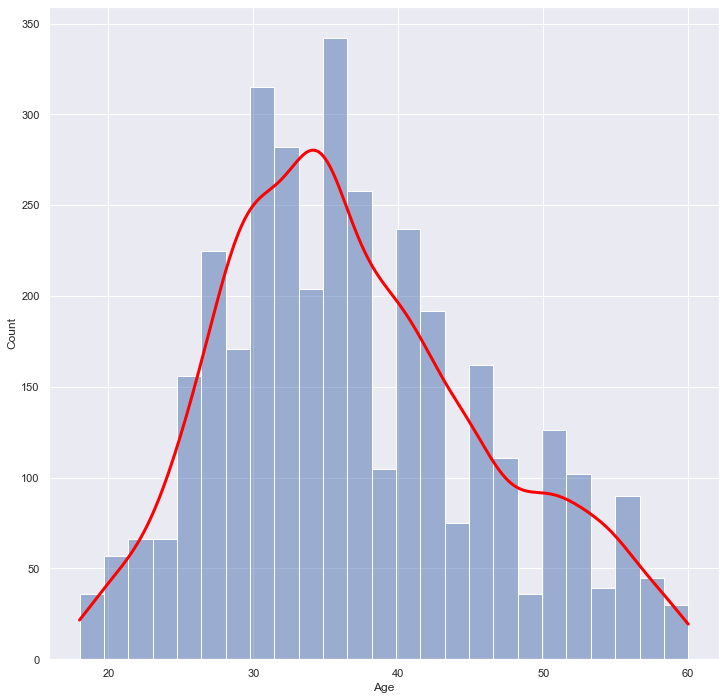

In [115]:
dens_plot = sns.histplot(data = data, x = 'Age', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

#### Boxplot

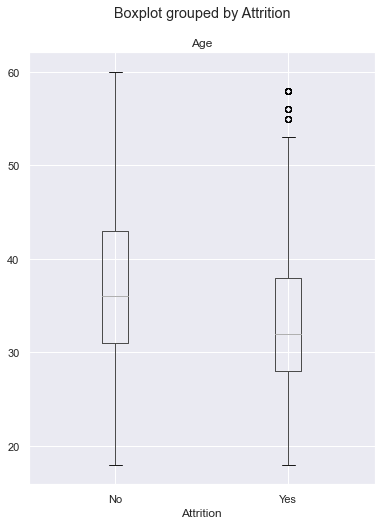

In [116]:
getPlot = data.boxplot(column='Age', by = 'Attrition', figsize=(6, 8))

#### Bar plot

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

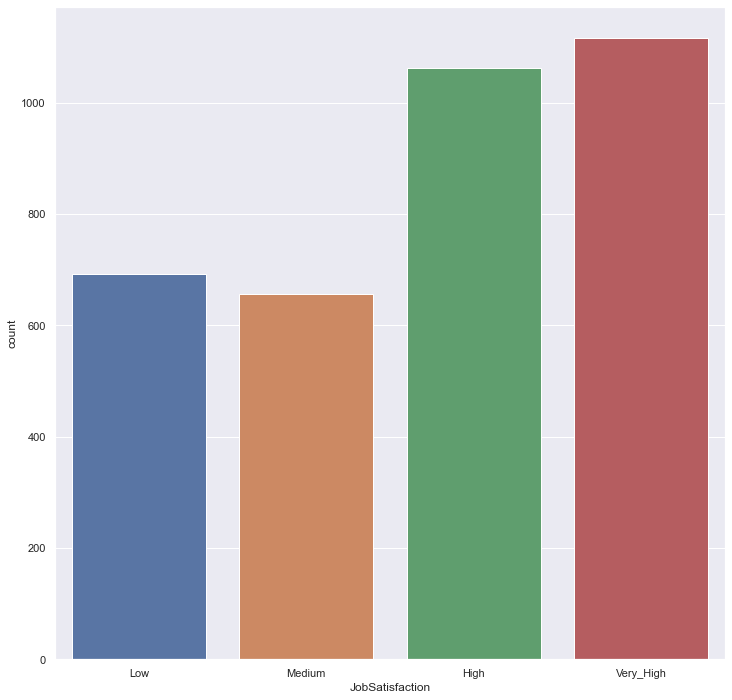

In [117]:
order = ["Low", "Medium", "High", "Very_High"]
sns.countplot(x = "JobSatisfaction", data = data, order = order)

## Hypothesis testing

## Defining the p-Value

+ We **initially assume that the null hypothesis is true**. That is we assume:
$$\mu = \mu_0$$

+ CLT states:
$$
\bar X \sim N\left(\dfrac{\mu_0}{\frac{s}{\sqrt{n}}}\right)
$$
and as a consequence:
$$
\quad\\
\dfrac{\bar X - \mu_0}{\frac{s}{\sqrt{n}}}\sim Z
\quad\\
$$
+ We can use this information and our knowledge of the standard normal $Z$ to compute the probability of randomly obtaining a sample *as bad for $H_0$ or worse* as the one we have.

### Mean testing

In [2]:
n = 100 # Change
mu0 = 1000 # Change
barX = 998.5 # Change
s = np.sqrt(36.1) # Change

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))


sl = 0.95
alpha = 1 - sl
criticalValue = stats.norm.isf(1 - alpha)
print("The critical value (defining the rejection region) is: {:.4}".format(criticalValue))

pValue = stats.norm.cdf(Zscore) # Change
# pValue = stats.norm.sf(Zscore)
# pValue = 2 * stats.norm.sf(Zscore) 

print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is -2.497
The critical value (defining the rejection region) is: -1.645
And the resulting p-value is: 0.006271


### T-test

#### Without file

In [4]:
n = 100 # Change
mu0 = 1000 # Change
barX = 998.5 # Change
s = np.sqrt(36.1) # Change
df = n -1

Tscore = (barX - mu0)/(s/np.sqrt(n))
print("The T score for this sample is {:.4}".format(Tscore))


sl = 0.95
alpha = 1 - sl
criticalValue = stats.t.isf(1 - alpha,  df, loc=0, scale=1)
print("The critical value (defining the rejection region) is: {:.4}".format(criticalValue))

pValue = stats.t.cdf(Tscore,  df, loc=0, scale=1) # Change
# pValue = stats.t.sf(Tscore,  df, loc=0, scale=1)
# pValue = 2 * t.norm.sf(Tscore,  df, loc=0, scale=1) 

print("And the resulting p-value is: {:.4}".format(pValue))

The T score for this sample is -2.497
The critical value (defining the rejection region) is: -1.66
And the resulting p-value is: 0.007096


#### With file

In [5]:
link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv" # Change link
data = pd.read_csv(link)
X = data.cty # Change to the desired variable

mu0 = 16 # Change to null hypothesis mean
alternative = "greater" # Change to alternative hypothesis: less, greater or two-sided

Tscore, pValue = stats.ttest_1samp(X, 
                                   popmean=mu0,
                                   alternative=alternative)

print("The sample size is {:3d}".format(len(X)))
print("The sample mean is {:.4}".format(X.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is 234
The sample mean is 16.86
The T score is 3.087
And the corresponding p-value is 0.001132


### Power
Probability of rejecting false null hypothesis

#### Theory

Errors of Types I and II

<div class="center">
<table>
<tbody>
<tr class="odd">
<th style="text-align: center;"></th>
<th style="text-align: center;"></th>
<th colspan="2" style="text-align: center;"><u><strong>What hypothesis is true?</strong></u></th>
</tr>
<tr class="even">
<td style="text-align: center;"></td>
<td style="text-align: center;"></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>H</em><sub><em>a</em></sub></span> (alternative)
is true</strong></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>H</em><sub>0</sub></span> (null) is
true</strong></td>
</tr>
<tr class="odd">
<td style="text-align: left;"><u><strong>Test Result</strong></u></td>
<td style="text-align: center;"><strong>Reject <span
class="math inline"><em>H</em><sub>0</sub></span></strong></td>
<td style="text-align: center;">Right decision</td>
<td style="text-align: center;">Error type I (<span
class="math inline"><em>α</em></span>)</td>
</tr>
<tr class="even">
<td style="text-align: center;"></td>
<td style="text-align: center;"><strong>Reject <span
class="math inline"><em>H</em><sub><em>a</em></sub></span></strong></td>
<td style="text-align: center;">Error type II (<span
class="math inline"><em>β</em></span>)</td>
<td style="text-align: center;">Right decision</td>
</tr>
</tbody>
</table>
</div>  


<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\text{power} = 1 - \beta = K\, \dfrac{\delta\,\sqrt{n}\,\alpha}{\sigma}
\quad\\
$
}
$$
</p> 

  where $K$ is a certain constant (we don't need to worry about it) and:
   + $n$ is the sample size
   + $\sigma$ is the population standard deviation.
   + $\delta$ is the **effect size**. That is the *minimal difference between $\mu$ and $\mu_0$ that we want the test to be able to detect* (in order to reject the null). This is analogous to the width of the confidence interval that we discussed in the previous session. 

In [27]:
delta = 0.1 # Change
sd = 0.5 # Change
alpha = 0.05 # Change
n = 100 # Change

Calculate power

In [30]:
power = smp.ttest_power(effect_size = delta / sd, 
                nobs=n, alpha=alpha, alternative="larger")

print("The power for the test is {:.3}".format(power))

The power for the test is 0.634


Calculate sample size for given power

In [31]:
power = 0.8

sample_size = smp.tt_solve_power(effect_size = delta / sd, 
                power = power, alpha = alpha, alternative = "larger")

print("The minimum sample size to get that power is at least {:3d}".format(
        int(np.ceil(sample_size))))

The minimum sample size to get that power is at least 156


### Chi-squared

+ Three cases:
$$\begin{cases}
&\text{Null Hypothesis}&\text{Alternative Hypothesis}\\
\text{One sided (left):}& H_0 = \{\sigma^2 \leq \sigma^2_0\}, & H_a = \{\sigma^2 > \sigma^2_0\}\\
\text{One sided (right):}& H_0 = \{\sigma^2 \geq \sigma^2_0\}, & H_a = \{\sigma^2 < \sigma^2_0\}\\
\text{Two sided:}& H_0 = \{\sigma^2 = \sigma^2_0\}, & H_a = \{\sigma^2 \neq \sigma^2_0\}
\end{cases}
$$

+ The right kind of comparison uses quotients and not differences. The sampling distribution of the variance was described by this equation
$$
\quad\\
Y = (n-1)\dfrac{s^2}{\sigma^2}\, \sim\,\chi^2_k,\quad\mbox{ where }\,k=n-1.\\
$$
This equation can be used to obtain a $Y$-score that will define a p-value when we use the corresponding $\chi^2_k$ as the probability scale.  The only thing to keep in mind is that when we use this result we will change $\sigma^2$ with $\sigma_0^2$ because, just as in the case of the mean, that choice is the one that favors the null hypothesis the most.

+ Finally, when a test for the standard deviation is required we have to pay to attention and take the square or the square root of the sample values as needed. 

In [8]:
# Load the data and check the first lines
link = "data/GEAR.txt" # Change
data = pd.read_csv(link)
data.head()
X = data.DIAMETER # Change

# Compute the required sample measures
s = X.std()
print("Sample standard deviation s =  {:.4}".format(s))
n = len(data)
print("Sample size n =  {:4d}".format(n))

# Enter the reference value sigma0 
####  Double check if it is squared!! #######
sigma0_2 = 0.000025 # Change

# Compute the chi score
chiScore = (n - 1) * s**2/sigma0_2
print("The chi square score is {:.4}".format(chiScore))


pValue = stats.chi2.cdf(chiScore, df = n -1) # Change
# pValue = stats.chi2.sf(chiScore, df = n -1)
# pValue = 2 * stats.chi2.sf(chiScore, df = n -1) 
print("The p-value is {:.4}".format(pvalue))

Sample standard deviation s =  0.006279
Sample size n =   100
The chi square score is 156.1
The p-value is 0.0004427


## Modeling

### Plots

#### Continuous variables - Scatter plot

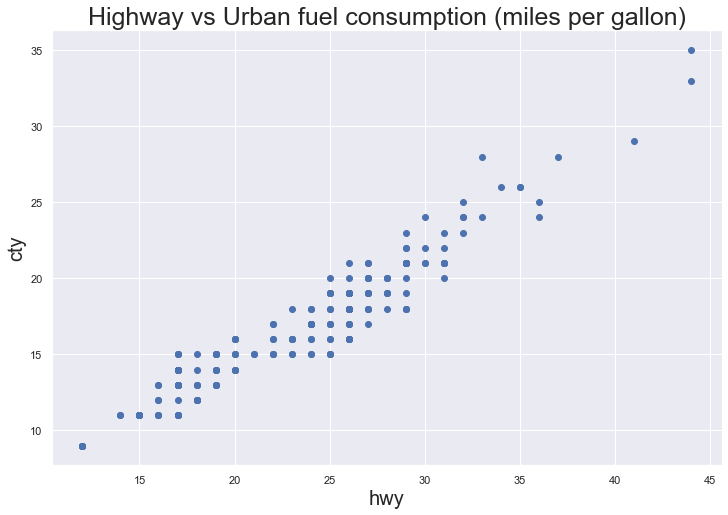

In [19]:
link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv" # Change
data = pd.read_csv(link) 

sns.set(rc={'figure.figsize':(12, 8)})
x = 'hwy' # Change
y = 'cty' # Change
plt.plot(x, y, 'bo', data=data)
plt.xlabel(x, fontdict={'fontsize':20})   
plt.ylabel(y, fontdict={'fontsize':20})
plt.title('Highway vs Urban fuel consumption (miles per gallon)', fontdict={'fontsize':25}) # Change
plt.show()

#### Continuous vs categorical variable - Boxplots and Violin plots

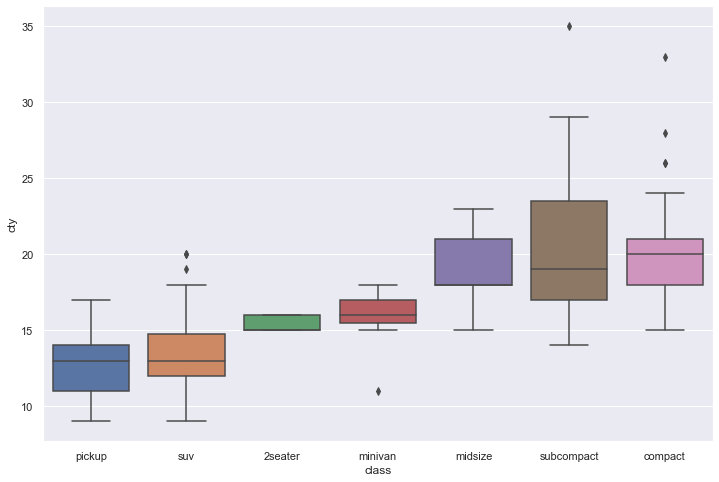

In [24]:
link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv" # Change
data = pd.read_csv(link) 

cont = 'cty' # Change
cat = 'class' # Change

class_order_by_cty = list(data[[cont, cat]].groupby(cat).median().sort_values(cont).index)

sns.boxplot(x='class', y='cty', data=data, order=class_order_by_cty)
plt.show()

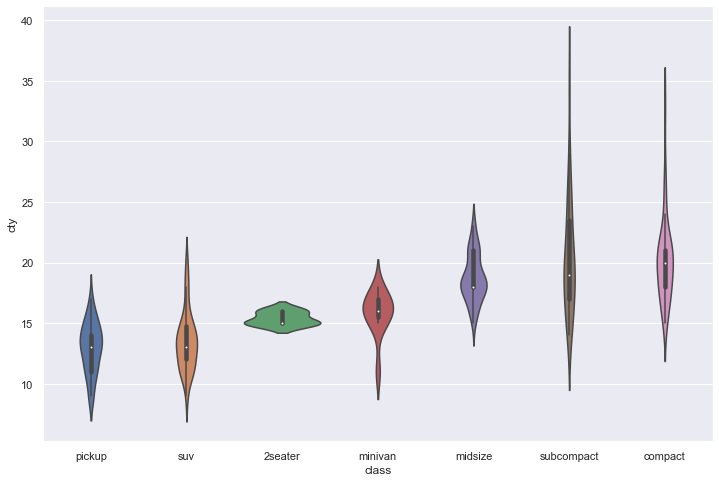

In [27]:
sns.violinplot(data=data, x=cat, y=cont, order=class_order_by_cty)
plt.show()

#### Pairplot

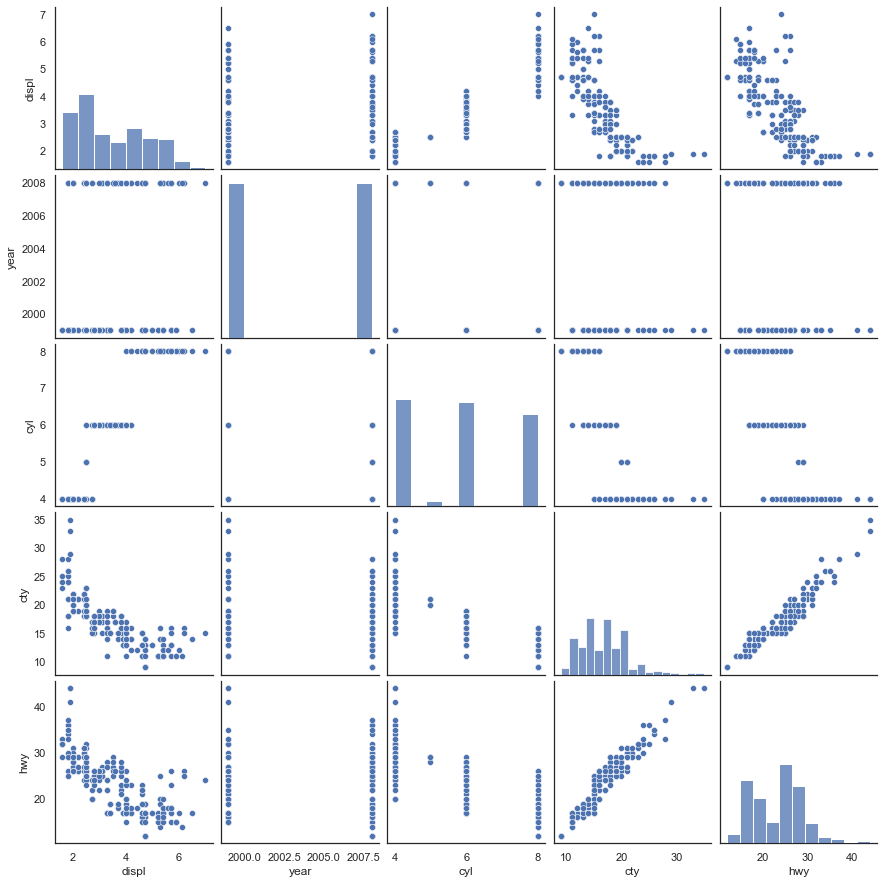

In [40]:
sns.set_style("white")
sns.pairplot(data)
# sns.pairplot(data, hue="drv") # Change
plt.show()

### Regression

#### Visualization

In [54]:
link = "./data/07_simple_linear_regression_01.csv"
data = pd.read_csv(link)

In [55]:
data.corr()

,X,Y
X,1.000000,0.891739
Y,0.891739,1.000000


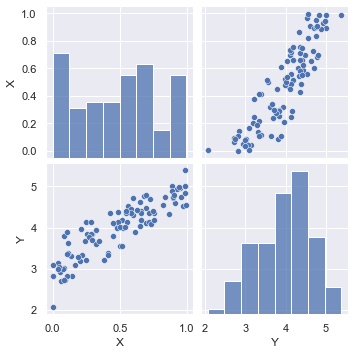

In [60]:
sns.pairplot(data)
plt.show()

#### Training

In [48]:


# The linear regression model in Scikit requires that
# the X array be two-dimensional. But in our case a 
# single column gives a 1D array. That is why, after
# extracting the values from the columns we reshape it.
X = data.X.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = data.Y.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))

The regression line is y = 3.00341 + 2.00299 x


#### Prediction

In [50]:
# Create an array from the list of X coordinates of new observtions
X_new = np.array([0.3])
# Make it 2D
X_new = X_new[:, np.newaxis]
# Use the predict method from our model
Y_new = XY_fit.predict(X_new)
# Look at the predicted values
print(f"The predicted value is {Y_new}")

The predicted value is [3.6043027]


##### Plot the training values against the regression line

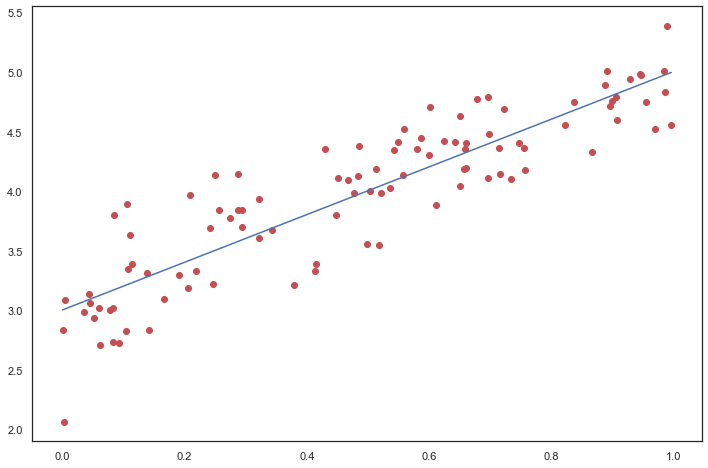

In [51]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro')
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

#### Inference

In [64]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
X_1 = sm.add_constant(X)
X_1[:5, :]

array([[1.        , 0.24742606],
       [1.        , 0.09299006],
       [1.        , 0.61176337],
       [1.        , 0.06066207],
       [1.        , 0.66103343]])

In [69]:
model_DF0 = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares
DF0_fit = model_DF0.fit()
DF0_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     380.5
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.62e-35
Time:                        17:31:15   Log-Likelihood:                -22.754
No. Observations:                 100   AIC:                             49.51
Df Residuals:                      98   BIC:                             54.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0034      0.058     51.402      0.000       2.887       3.119
x1             2.0030      0.103     19.507      0.000       1.799       2.207
==============================================================================
Omnibus:                        0.219   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.162
Skew:                          -0.096   Prob(JB):                        0.922
Kurtosis:                       2.953   Cond. No.                         4.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The const and x1 lines show the std error, the p-value and the conf interval

In [73]:
# Coefficients
print(f'Coefficients: {DF0_fit.params}')
# Standard error
print(f'Standard error: {DF0_fit.bse}')
# Confidence intervals
print(f' Confidence intervals: {DF0_fit.conf_int(alpha=0.05)}')
# P-values
print(f'P-values: {DF0_fit.pvalues}')
# Pearson correlation coefficient
print(f'Pearson correlation coefficient: {DF0_fit.rsquared}')

Coefficients: [3.00340676 2.00298647]
Standard error: [0.05842984 0.102682  ]
 Confidence intervals: [[2.88745465 3.11935887]
 [1.79921738 2.20675556]]
P-values: [1.07654357e-72 1.61896118e-35]
Pearson correlation coefficient: 0.7951980862337173


#### Confidence bands

In [76]:
# We create a new dataset that has 100 points equally spaced in the interval of the training set
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
# We predict for those values
DF0_fit.pred = DF0_fit.get_prediction(X_new)

In [77]:
# Summary frame for alpha = 0.05
DF0_fit.pred.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.004452,0.058384,2.888590,3.120314,2.384533,3.624371
1,3.024594,0.057508,2.910471,3.138718,2.404998,3.644191
2,3.044737,0.056638,2.932341,3.157133,2.425457,3.664017
3,3.064879,0.055773,2.954200,3.175558,2.445908,3.683850
4,3.085022,0.054913,2.976048,3.193996,2.466354,3.703690


In [79]:
DF0_fit_fitted_new = DF0_fit.pred.summary_frame(alpha=0.05)["mean"]
DF0_fit_confBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_lower"]
DF0_fit_confBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_upper"]

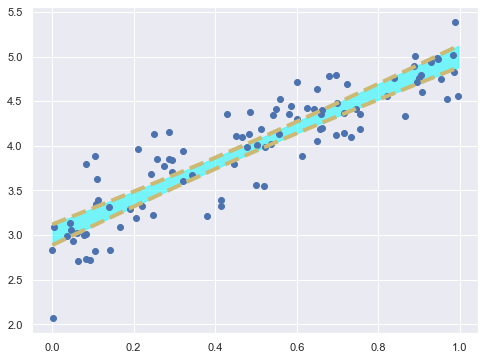

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, Y, "o", label="data")
#ax.plot(X_new[:,1], DF_fit_fitted_new, "r--.", label="OLS", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_low, "y--", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_high, "y--", lw = 4)
ax.fill_between(X_new[:,1], 
                y1 = DF0_fit_confBand_low, 
                y2 = DF0_fit_confBand_high, 
                color='cyan', alpha = 0.5)

# Now let us fit a regression line for each sample and plot the result.
# N = 5
# palette2 = iter(sns.color_palette(palette="deep", n_colors=N))
# for sample in range(N):
#     # select the sample
#     DFs = DF.loc[sampleId == sample, :] 
#     Xs = DFs.X
#     Ys = DFs.Y
#     # fit the regression line
#     b0, b1 = getLM(Xs,Ys)
#     #print(sample, b0, b1,"\n", "--"*5)
#     # plot the line
#     Xnew = np.linspace(0, 1, num = 100)
#     Ynew = b0 + b1 * Xnew

#     plt.plot(Xnew, Ynew, color = next(palette2), alpha = 0.1)

#### Prediction bands

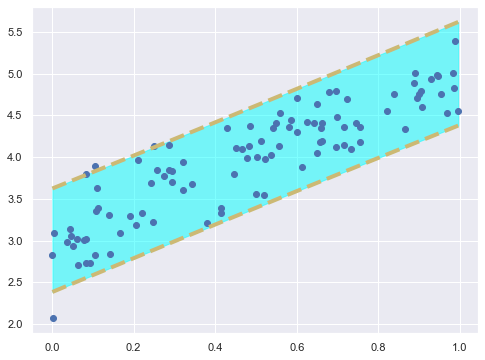

In [85]:
DF0_fit_predBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["obs_ci_lower"]
DF0_fit_predBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, Y, "o", label="data")
#ax.plot(X_new[:,1], DF_fit_fitted_new, "r--.", label="OLS", lw = 4)
ax.plot(X_new[:, 1], DF0_fit_predBand_low, "y--", lw = 4)
ax.plot(X_new[:, 1], DF0_fit_predBand_high, "y--", lw = 4)
ax.fill_between(X_new[:, 1], 
                y1 = DF0_fit_predBand_low, 
                y2 = DF0_fit_predBand_high, 
                color='cyan', alpha = 0.5)

#### Diagnosis plots

In [86]:
%run ./code/Linear_Reg_Diagnostic.py
DF0_fit_diagnose = Linear_Reg_Diagnostic(DF0_fit)

##### Residual vs Fitted plot

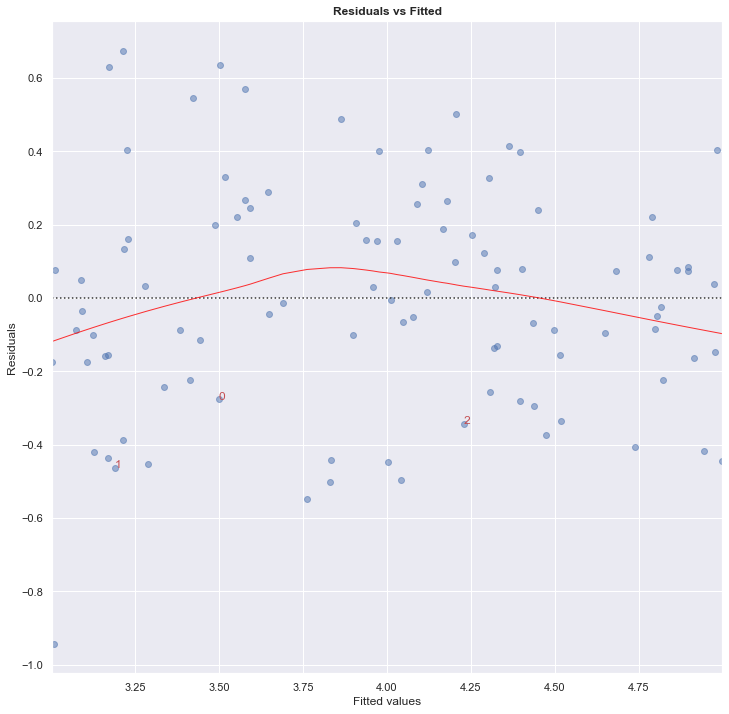

In [87]:
DF0_fit_diagnose.residual_plot()
plt.show()

- The residuals should seem to follow a homogenous random vertical distribution all across the horizontal axis
- The red line should be as horizontal as possible

##### Residual QQ-plot

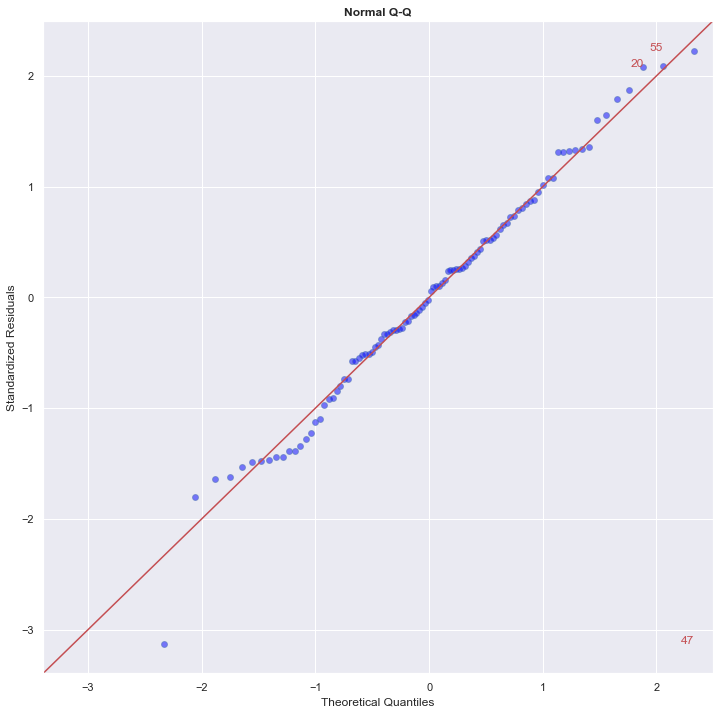

In [88]:
DF0_fit_diagnose.qq_plot()
plt.show()

- The dots should mostly follow the red line

##### Scale-location plot

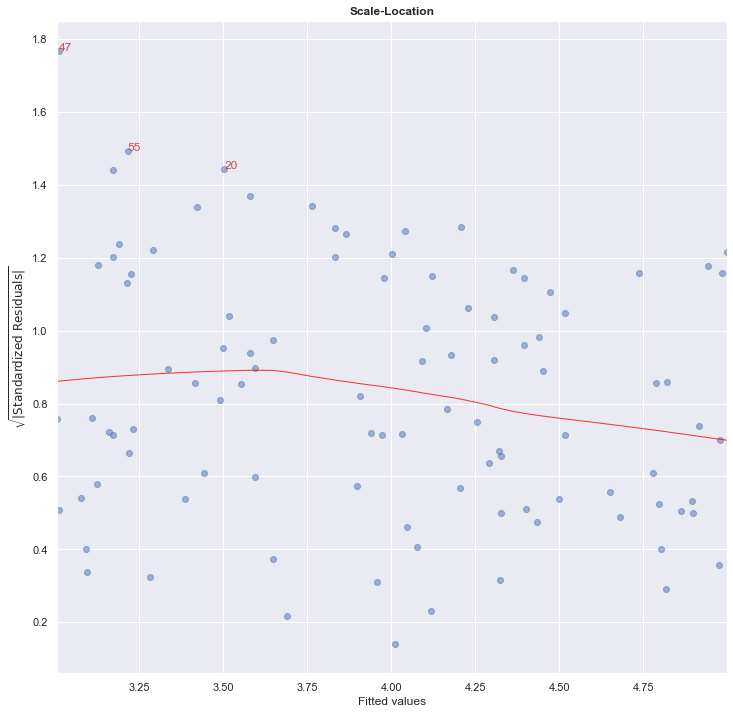

In [89]:
DF0_fit_diagnose.scale_location_plot()
plt.show()

- Like resudials vs fitted

##### The Residual vs Leverage plot

We look for influential values

In [90]:
DF0_fit_influence = DF0_fit.get_influence()
DF0_hatValues = DF0_fit_influence.hat_matrix_diag
any(DF0_hatValues > 4 / n)

False

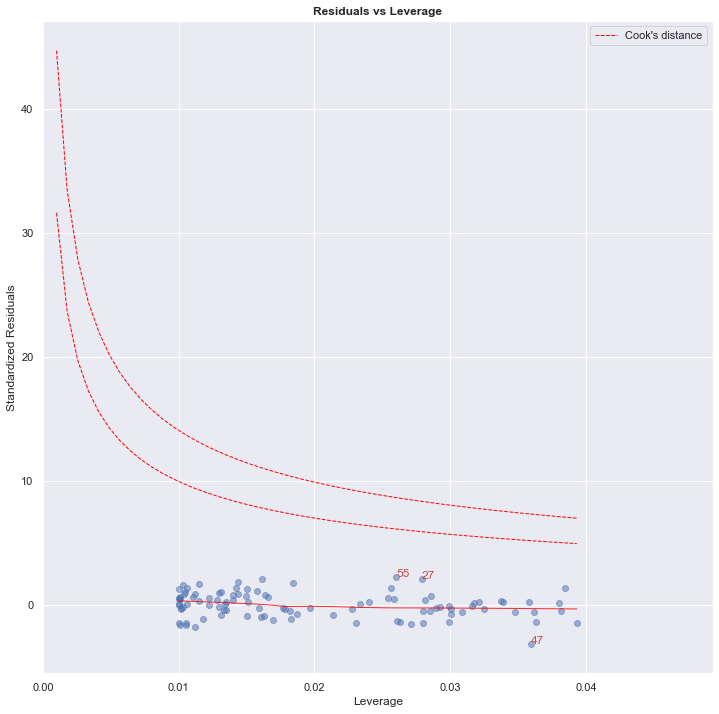

In [91]:
DF0_fit_diagnose.leverage_plot()
plt.show()

- Influential points are located above the curves
- If found, treat like outliers (do the regression with and without to understand the behavior)

### Linear Regression for Curves

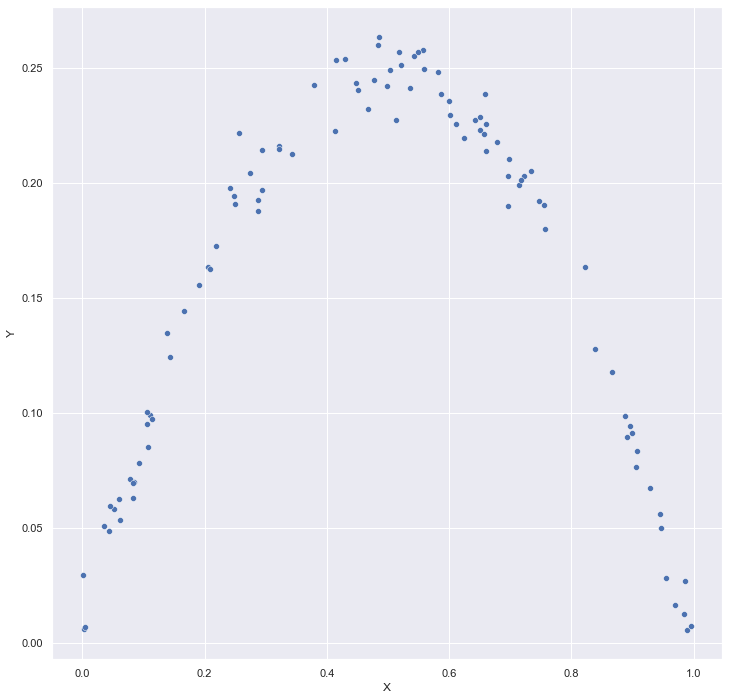

In [92]:
S2 = pd.read_csv("./data/07_simple_linear_regression_02.csv")
sns.scatterplot(x = S2.X, y = S2.Y)
plt.show()

#### Training

We create a column with the squared of x

In [93]:
S2["X2"] = S2.X**2
print(S2.head())

          X         Y        X2
0  0.247426  0.194045  0.061220
1  0.092990  0.078447  0.008647
2  0.611763  0.225407  0.374254
3  0.060662  0.062402  0.003680
4  0.661033  0.225489  0.436965


We fit the model

In [96]:
S2_fit = sm.OLS(S2.Y, sm.add_constant(S2[["X", "X2"]])).fit()
S2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3488.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           4.52e-91
Time:                        10:41:45   Log-Likelihood:                 325.05
No. Observations:                 100   AIC:                            -644.1
Df Residuals:                      97   BIC:                            -636.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.003      2.135      0.035       0.000       0.010
X              0.9769      0.012     81.869      0.000       0.953       1.001
X2            -0.9827      0.012    -83.305      0.000      -1.006      -0.959
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.456
Skew:                           0.238   Prob(JB):                        0.483
Kurtosis:                       3.352   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot the regression line

In [97]:
X_new = np.linspace(S2.X.min(), S2.X.max(), 100)
newData = pd.DataFrame({'X':X_new, 'X2':X_new**2})
newData = sm.add_constant(newData)
newData.head()

,const,X,X2
0,1.0,0.000522,2.723250e-07
1,1.0,0.010578,1.118954e-04
2,1.0,0.020634,4.257733e-04
3,1.0,0.030690,9.419061e-04
4,1.0,0.040747,1.660294e-03


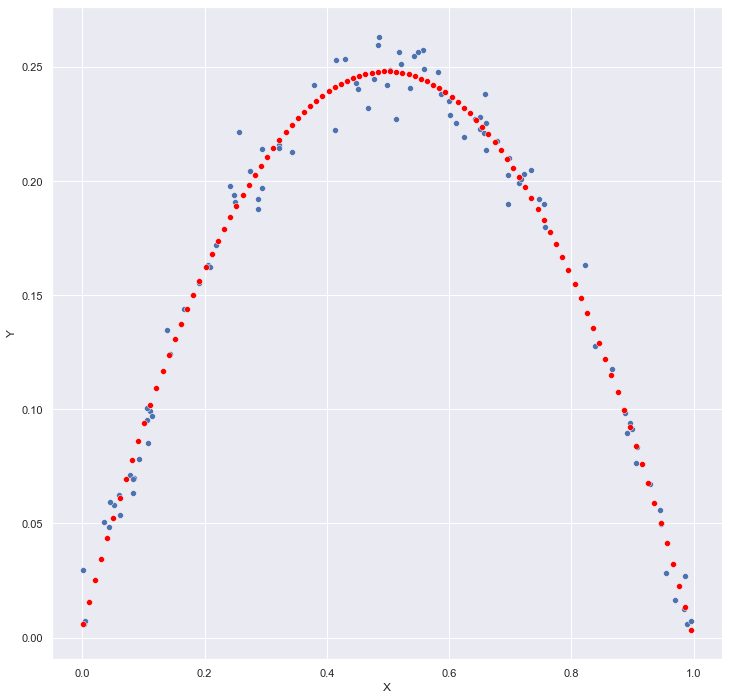

In [98]:
S2_pred = S2_fit.get_prediction(newData)
S2_fitted_new = S2_pred.summary_frame(alpha=0.05)["mean"]
S2_pred.summary_frame()
sns.scatterplot(x = S2.X, y = S2.Y)
sns.scatterplot(x = newData['X'], y = S2_pred.summary_frame()["mean"], color ="red")
plt.show()

### Multivariate linear models

In [99]:
framingham_url = "https://raw.githubusercontent.com/mbdfmad/fmad2122/main/data/framingham.csv" # Change
framingham = pd.read_csv(framingham_url)
fram = framingham # shorten name
fram.dropna(inplace=True)
fram.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### Training

In [100]:
fram_fit = sm.OLS(fram.totChol, sm.add_constant(fram[["age", "BMI"]])).fit()
fram_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                totChol   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     157.1
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.38e-66
Time:                        10:44:56   Log-Likelihood:                -18890.
No. Observations:                3658   AIC:                         3.779e+04
Df Residuals:                    3655   BIC:                         3.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4059      5.680     25.954      0.000     136.270     158.541
age            1.3208      0.083     16.004      0.000       1.159       1.483
BMI            0.9305      0.174      5.354      0.000       0.590       1.271
==============================================================================
Omnibus:                      466.406   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1137.398
Skew:                           0.731   Prob(JB):                    1.04e-247
Kurtosis:                       5.308   Cond. No.                         458.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Prediction

In [101]:
fram_pred = fram_fit.get_prediction(newData)

### ANOVA
Explanatory variable is a factor

In [104]:
iris = pd.read_csv("./data/iris.csv")
iris.head()
# Check that there are no NAs!
iris.rename(columns= {'Sepal.Length':'SepalLength'},inplace=True)

Create dummies for the different species

In [105]:
Species_dummies = pd.get_dummies(iris.Species).values
Species_dummies[45:55, :]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

We eliminate one of the variables because they are not independent between them, then we use the other two for a regression model

In [107]:
Species_dummies = Species_dummies[:, 1:]

In [108]:
X = Species_dummies
X = sm.add_constant(X)
iris_fit = sm.OLS(iris.SepalLength, X).fit()
iris_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SepalLength   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           1.67e-31
Time:                        11:02:27   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0060      0.073     68.762      0.000       4.862       5.150
x1             0.9300      0.103      9.033      0.000       0.727       1.133
x2             1.5820      0.103     15.366      0.000       1.379       1.785
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.785
Skew:                           0.119   Prob(JB):                        0.675
Kurtosis:                       3.263   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ A model like this one is an example of the classical *One-way Anova* (one way meaning one factor):
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon, \qquad \text{ with }\quad \epsilon\sim N(0, \sigma)
$$
and $X_1, X_2$ being the reamining dummy variables.

+ You can see that the summary table for the fit contains three parameters for the model. What is their interpretation? 
  + The intercept is the mean of $Y$ = `SepalLength` of the reference level.
  + The remaining two parameters represent the difference between the mean of `SepalLength` for that level and the mean for the reference level. 
![](./fig/07-AnovaBoxplots.png)  
Let us check this:

+ The nice thing about this is that we also have inference results about the difference of those means. For example, we have a p-value to tell us if the means of `SepalLength` for `Species = setosa`,  can be considered to be significantly different from that for  `Species = virginia` and `Species = versicolor`. To be precise, the null hypothesis being tested here is:
$$
\quad\\
H_0 = \{\mu_1 = \mu_2 = \mu_3\}
\quad\\
$$
and in particular the alternative is **not** all the three means are different, but *there are two of them that are different*. But if we reject that null, we can not yet identify a significantly different pair, because that brings ut back to the problem of multiple testing, and we know that this requires extra work that we will not make here.